<a href="https://colab.research.google.com/github/cheronoF/GitPractice/blob/main/R%26D_Profits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reading the Data 

In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [6]:
# Reading the data 
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv"
df = pd.read_csv(url)


In [7]:
# Viewing the first 5 rows 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Viewing the last 5 rows 
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
# Checking the size of the dataset 
df.shape

(50, 5)

In [9]:
# Checking the data types 
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
# Statistical Description 
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- The average R&D Spend is 73,721, the average Adminstration Spend is 121,344, the Marketing Spend is 211,025 while the Average Profit is 112,012 in USD
- Maximum marketing spend is 471,784
- Minimum Profit is 14,681 even when Marketing Spend is 0 while the Maximum Profit is 192,261



In [17]:
# Checking the names of States 
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

2. Data Cleaning 

In [19]:
# Checking for null values 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no missing values 

In [21]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


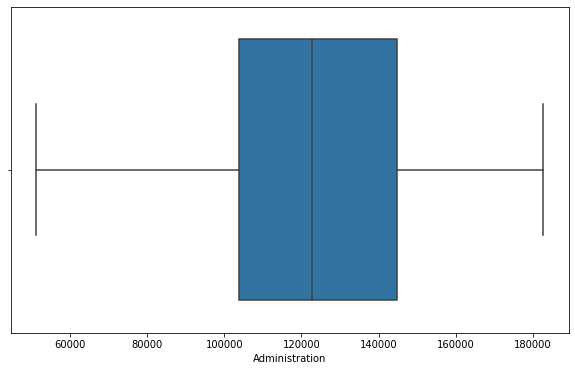

In [22]:
# Checking the Outliers for Administration Spend
plt.figure(figsize=(10,6))
sns.boxplot(df['Administration'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


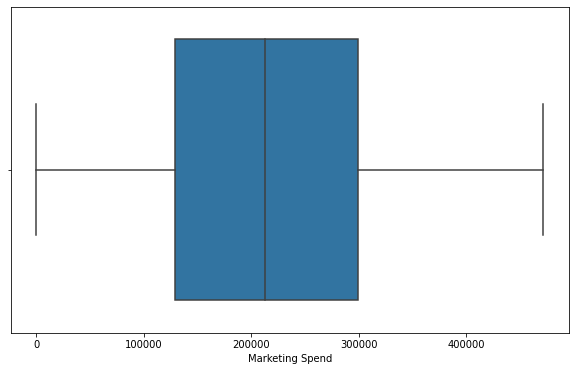

In [24]:
# Checking Outliers on Marketing Spend 
plt.figure(figsize=(10,6))
sns.boxplot(df['Marketing Spend'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


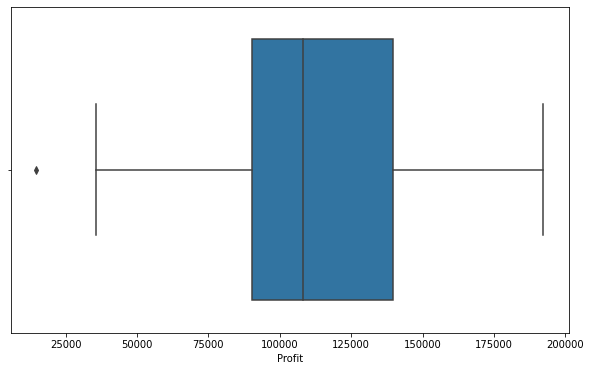

In [25]:
# Outliers for profit 
plt.figure(figsize=(10,6))
sns.boxplot(df['Profit'])

In [26]:
# Using pip
!pip install plotnine # Grammar of Graphics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3. EDA 

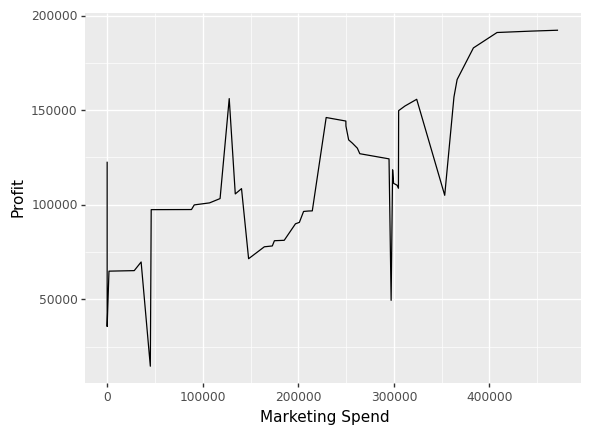

<ggplot: (8729002885525)>

In [28]:
# Relationship between Marketing Spend and Profit 

from plotnine import ggplot, aes, geom_line, geom_bar

# Relationship between Ratings and Recommendations 

(
    ggplot(df)  # What data to use
    + aes(x="Marketing Spend", y="Profit")  # What variable to use
    + geom_line()
    )  # Geometric object to use for drawing

In [31]:
# Bar Plot Function for Univariate Analysis 
def univariate_visuals(column, kind, title, xlabel, ylabel): 
  sns.set(font_scale=1.5)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize= (12,8), rot=90)
  elif kind =='bar':
    df[column].value_counts().plot(kind=kind, figsize= (12,8), rot=90)
  plt.xlabel(xlabel=xlabel, labelpad =12)
  plt.ylabel(ylabel=ylabel, labelpad = 12)
  plt.title (title, y=1)
  return plt.show()

In [49]:
# Checking the number of Entries per State

df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

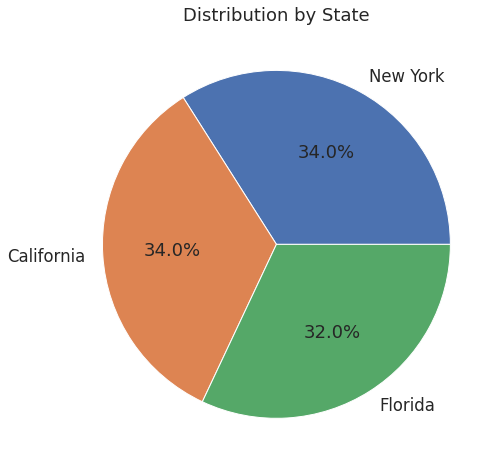

In [33]:
univariate_visuals('State', 'pie', 'Distribution by State', '', '')

Bivariate - Marketing Spend by State 

In [50]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Text(0, 0.5, 'Profit')

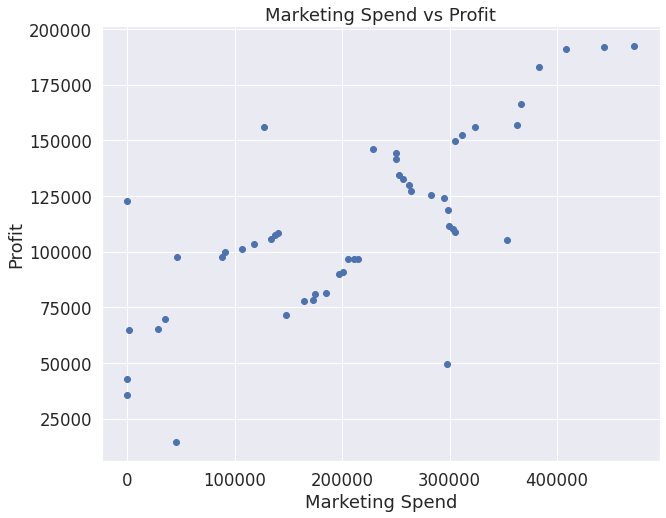

In [55]:
# Scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(df['Marketing Spend'], df['Profit'])

# Naming the Axes
plt.title("Marketing Spend vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")

In [16]:
df.columns 

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
# Checking the Correlation 
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


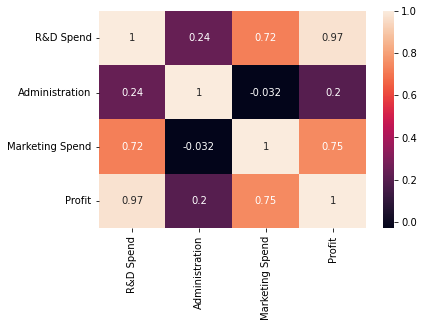

In [14]:
# Correlation Plot 
sns.heatmap(df.corr(), annot=True)
plt.show()

- There is a positive high correlation between R&D Spend and Profit at 0.97 
- There is a negative correlation between Administration and the Marketing Spend as -0.032




4. Data Preprocessing

In [60]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
# Label Encoding the States 
# label encoding 
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

df['State']=en.fit_transform(df['State'])

In [62]:
# Cheking to see the implementation

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [64]:
# Feature Selection Using LDA 

features = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
numerical = df['Profit']

In [66]:

feat=features #dependent variables
label=numerical # target variable 

In [67]:
# Using the Random Forest Regressor since this is a Regression Challenge
X= feat
y=label


In [68]:
# importing library
from sklearn.ensemble import RandomForestRegressor

In [69]:
# inatatiating  random forest classifier
model= RandomForestRegressor(n_estimators=300)

In [70]:
# fitting model to X and  y
model.fit(X,y)

RandomForestRegressor(n_estimators=300)

In [71]:
# finding best features
importance=model.feature_importances_
importance

array([0.91785153, 0.00734974, 0.07182397, 0.00297477])

In [72]:
finaldf=pd.DataFrame({"features":pd.DataFrame(X).columns,"importance":importance})
finaldf.set_index("importance")
print(finaldf.sort_values("importance"))

          features  importance
3            State    0.002975
1   Administration    0.007350
2  Marketing Spend    0.071824
0        R&D Spend    0.917852


R&D carries the highest level of importance, followed by Marketing Spend

In [74]:
dataset = features[['R&D Spend', 'Marketing Spend']]

5. Modelling

In [75]:
# Checking the columns 
dataset.columns 

Index(['R&D Spend', 'Marketing Spend'], dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled=scaler.fit_transform(dataset)

In [77]:
scaled=pd.DataFrame(scaled, index=dataset.index, columns=dataset.columns)

In [80]:
scaled

,R&D Spend,Marketing Spend
0,2.016411,2.153943
1,1.955860,1.923600
2,1.754364,1.626528
3,1.554784,1.422210
4,1.504937,1.281528
5,1.279800,1.254210
6,1.340066,-0.688150
7,1.245057,0.932186
8,1.030369,0.830887
9,1.091819,0.776107


In [81]:
data_frame = scaled.join(numerical)
data_frame.head()

,R&D Spend,Marketing Spend,Profit
0,2.016411,2.153943,192261.83
1,1.955860,1.923600,191792.06
2,1.754364,1.626528,191050.39
3,1.554784,1.422210,182901.99
4,1.504937,1.281528,166187.94


In [82]:
# Linear Regression as BASELINE MODEL 

# Defining the X and y 

X = scaled
y = numerical 



In [83]:
X

,R&D Spend,Marketing Spend
0,2.016411,2.153943
1,1.955860,1.923600
2,1.754364,1.626528
3,1.554784,1.422210
4,1.504937,1.281528
5,1.279800,1.254210
6,1.340066,-0.688150
7,1.245057,0.932186
8,1.030369,0.830887
9,1.091819,0.776107


In [84]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [85]:
# Splitting our data into the train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [86]:
# Importing the Logistic Regression algorithm since this is a multinomial classification challenge 

from sklearn.linear_model import LinearRegression

In [88]:
LR = LinearRegression()

In [89]:
LR.fit(X_train, y_train)

LinearRegression()

In [90]:
# Making our prediction using our trained model.

y_pred=LR.predict(X_test)
y_pred

array([126855.2361752 ,  82296.53163594,  97254.25284333,  46368.65783156,
       130089.77652378,  45938.44319255, 109289.06770923, 101151.02557555,
        96602.22391222, 112698.58543305, 128200.14138324, 170227.35281016,
        87437.66156335, 151341.85025263, 172650.42202302])

In [94]:
# Evaluating the model.
y_pred = LR.predict(X_test)

In [95]:
from sklearn import metrics 
metrics.mean_absolute_error(y_test, y_pred)


6449.238325233509

In [96]:
metrics.mean_squared_error(y_test, y_pred)

66537675.8465543

In [97]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

8157.062942417099

Model Optimization 

A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search.

Random Search. Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.
Grid Search. Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

Gradient Boost Regressor

In [104]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
GBR = GradientBoostingRegressor()

In [106]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

 

In [108]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [109]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [110]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.948494248078085

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
